## Nonlinear Programming

### Modeling the problem using python

#### 0. Importing libraries

In [66]:
import numpy as np
%pip install matplotlib
import matplotlib.pyplot as plt
%pip install prettytable
from prettytable import PrettyTable

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


#### 1. Function we want to maximize, along with some plots

In [67]:
def f(x):
    return 12 * x - 3 * x**4 - 2 * x**6

def first_der_f(x):
    return 12 * (1 - x**3 - x**5)

def second_der_f(x):
    return -12 * (3 * x**2 + 5 * x**4)

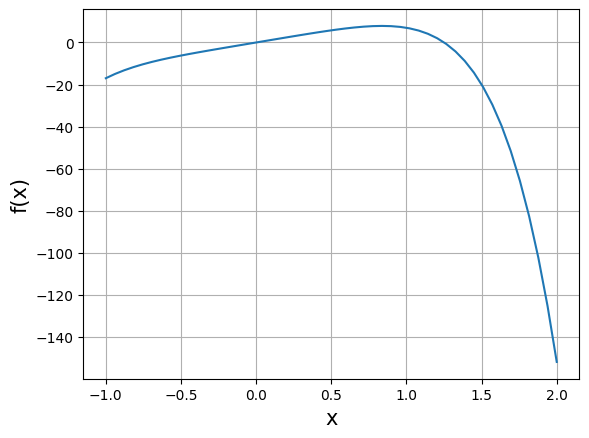

In [68]:
x = np.linspace(-1, 2, 50)

plt.plot(x, f(x))
plt.xlabel("x", fontsize = 15)
plt.ylabel("f(x)", fontsize = 15)
plt.grid(True)
plt.show()

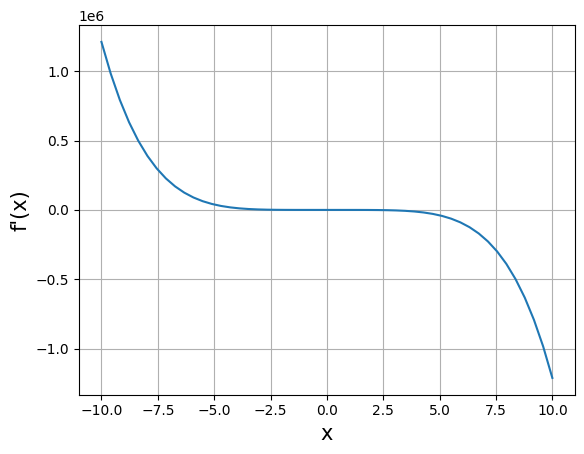

In [69]:
x = np.linspace(-10, 10, 50)

plt.plot(x, first_der_f(x))
plt.xlabel("x", fontsize = 15)
plt.ylabel("f'(x)", fontsize = 15)
plt.grid(True)
plt.show()

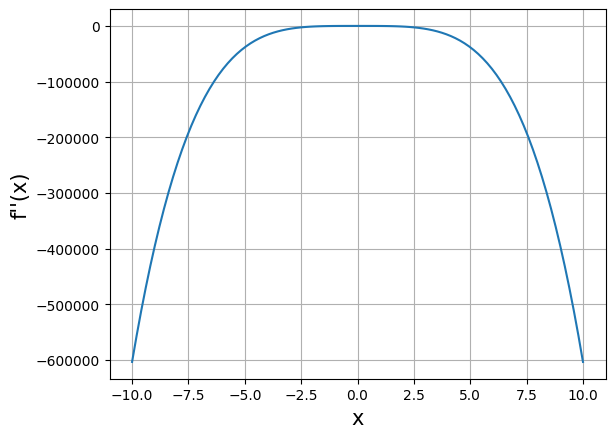

In [70]:
x = np.linspace(-10, 10, 100)

plt.plot(x, second_der_f(x))
plt.xlabel("x", fontsize = 15)
plt.ylabel("f''(x)", fontsize = 15)
plt.grid(True)
plt.show()

#### 2. Bisection Method

In [81]:
def bisection(x_lower, x_upper, eps):

    ### for formatting output ###
    table = PrettyTable(['iteration', 'first_der_(x)', 'x_lower', 'x_upper', 'x', 'f(x)'])


    ### algorithm ###
    x = 0.5 * x_lower + 0.5 * x_upper # set initial iterate
    i = 0 # iteration counter 

    table.add_row([i, 'NA', x_lower, x_upper, x, f(x)])

    while x_upper - x_lower > 2 * eps:
        i += 1
        
        if first_der_f(x) >= 0:
            x_lower = x
        elif first_der_f(x) <= 0:
            x_upper = x

        x = 0.5 * x_lower + 0.5 * x_upper
        table.add_row([i, first_der_f(x), x_lower, x_upper, x, f(x)])


    print(table)

#### 3. Output

In [82]:
x_lower = 0
x_upper = 2
eps = 0.01

bisection(x_lower, x_upper, eps)

+-----------+---------------------+----------+---------+-----------+-------------------+
| iteration |    first_der_(x)    | x_lower  | x_upper |     x     |        f(x)       |
+-----------+---------------------+----------+---------+-----------+-------------------+
|     0     |          NA         |    0     |    2    |    1.0    |        7.0        |
|     1     |        10.125       |    0     |   1.0   |    0.5    |      5.78125      |
|     2     |      4.08984375     |   0.5    |   1.0   |    0.75   |   7.69482421875   |
|     3     |   -2.1939697265625  |   0.75   |   1.0   |   0.875   | 7.843864440917969 |
|     4     |  1.3143653869628906 |   0.75   |  0.875  |   0.8125  | 7.867180705070496 |
|     5     | -0.3396989107131958 |  0.8125  |  0.875  |  0.84375  | 7.882908208295703 |
|     6     |  0.5112529434263706 |  0.8125  | 0.84375 |  0.828125 | 7.881504240183858 |
|     7     | 0.09189239318948239 | 0.828125 | 0.84375 | 0.8359375 |  7.88386815030708 |
+-----------+--------